In [16]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_parquet('Base_EUR_HY.parquet', engine='fastparquet')
display(df)

,Cusip,ISIN,Description,Ticker,Coupon,Maturity,Composite Rating,Currency,Country,Sector Level 1,...,Core Tier1 Ratio CIQ,Tier1 Ratio CIQ,Prov for Loan Losses CIQ,Non perf Loans to Total Loans CIQ,Total Capital Ratio CIQ,Total Employees CIQ,SP Price Target CIQ,SP Price Close CIQ,SP Est 5Y EPS Gr CIQ,CIQ_ID_ff
862,'ED959527',XS0218256468,Owens Brockway Glass Container Inc.,OI,6.7500,2014-12-01,B1,EUR,US,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1382,'ED710859',XS0206714247,ISS Global A/S,ISSDC,4.5000,2014-12-08,B3,EUR,DK,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1383,'ED138759',XS0176317054,ISS Global A/S,ISSDC,4.7500,2010-09-18,B3,EUR,DK,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1585,'EF389568',XS0253470644,ISS A/S,ISSDC,8.8750,2016-05-15,CCC1,EUR,DK,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1656,'44701QAL',XS0300784898,Huntsman International LLC,HUN,7.5000,2015-01-01,B2,EUR,US,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514901,'73NXXCXX',XS2431015655,VZ Secured Financing BV,ZIGGO,3.5000,2032-01-15,BB3,EUR,NL,Corporate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IQ1929729903
7514902,'AFLL9IXX',XS2914769299,Ziggo Bond Company B.V.,ZIGGO,6.1250,2032-11-15,B3,EUR,NL,Corporate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IQ1929729903
7514912,'6UX577XX',XS2399851901,ZF Finance GmbH,ZFFNGR,2.2500,2028-05-03,BB3,EUR,DE,Corporate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IQ1929729903
7514925,'8ZM4YFXX',XS2681541327,ZF Europe Finance B.V.,ZFFNGR,6.1250,2029-03-13,BB3,EUR,DE,Corporate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IQ1929729903


In [18]:
# delete column with more than 80% of missing values
df=df.loc[:, df.isnull().mean() < 0.8]
display(df)

,Cusip,ISIN,Description,Ticker,Coupon,Maturity,Composite Rating,Currency,Country,Sector Level 1,...,Goodwill Impairment CIQ,change Net WorkCapital CIQ,CF from Investing,Repurchase Stock CIQ,CF total div paid CIQ,Total Asset CIQ,Total Employees CIQ,SP Price Target CIQ,SP Price Close CIQ,SP Est 5Y EPS Gr CIQ
862,'ED959527',XS0218256468,Owens Brockway Glass Container Inc.,OI,6.7500,2014-12-01,B1,EUR,US,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,'ED710859',XS0206714247,ISS Global A/S,ISSDC,4.5000,2014-12-08,B3,EUR,DK,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,'ED138759',XS0176317054,ISS Global A/S,ISSDC,4.7500,2010-09-18,B3,EUR,DK,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1585,'EF389568',XS0253470644,ISS A/S,ISSDC,8.8750,2016-05-15,CCC1,EUR,DK,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,'44701QAL',XS0300784898,Huntsman International LLC,HUN,7.5000,2015-01-01,B2,EUR,US,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514901,'73NXXCXX',XS2431015655,VZ Secured Financing BV,ZIGGO,3.5000,2032-01-15,BB3,EUR,NL,Corporate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7514902,'AFLL9IXX',XS2914769299,Ziggo Bond Company B.V.,ZIGGO,6.1250,2032-11-15,B3,EUR,NL,Corporate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7514912,'6UX577XX',XS2399851901,ZF Finance GmbH,ZFFNGR,2.2500,2028-05-03,BB3,EUR,DE,Corporate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7514925,'8ZM4YFXX',XS2681541327,ZF Europe Finance B.V.,ZFFNGR,6.1250,2029-03-13,BB3,EUR,DE,Corporate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# list of all types and columns
display(df.dtypes)

# list of all distinct columns types
print(df.dtypes.unique())

Cusip                    object
ISIN                     object
Description              object
Ticker                   object
Coupon                  float64
                         ...   
Total Asset CIQ         float64
Total Employees CIQ     float64
SP Price Target CIQ     float64
SP Price Close CIQ      float64
SP Est 5Y EPS Gr CIQ    float64
Length: 111, dtype: object

[dtype('O') dtype('float64') dtype('<M8[ns]') dtype('int64')]


In [20]:
# Find columns with all distinct values except NaN
columns_all_distinct = [col for col in df.columns 
                        if df[col].nunique() == (len(df) - df[col].isnull().sum()) 
                        and (len(df) - df[col].isnull().sum()) > 0]
print("\nColumns to drop:", columns_all_distinct)


Columns to drop: []


In [21]:
# print the column types that are object 
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

Index(['Cusip', 'ISIN', 'Description', 'Ticker', 'Composite Rating',
       'Currency', 'Country', 'Sector Level 1', 'Sector Level 2',
       'Sector Level 3', 'Sector Level 4', 'Type', 'UniverseDate',
       'Source data', 'CIQ_ID', 'Name', 'Exchange', 'Company SEDOL', 'ISIN_ff',
       'FACSET SECTOR', 'COUNTRY'],
      dtype='object')


In [22]:
# drop unnecessary columns
useless_columns = ['Cusip','ISIN', 'Description', 'Ticker','CIQ_ID','Company SEDOL','ISIN_ff']

df.drop(columns=useless_columns, inplace=True)
display(df)

,Coupon,Maturity,Composite Rating,Currency,Country,Sector Level 1,Sector Level 2,Sector Level 3,Sector Level 4,Type,...,Goodwill Impairment CIQ,change Net WorkCapital CIQ,CF from Investing,Repurchase Stock CIQ,CF total div paid CIQ,Total Asset CIQ,Total Employees CIQ,SP Price Target CIQ,SP Price Close CIQ,SP Est 5Y EPS Gr CIQ
862,6.7500,2014-12-01,B1,EUR,US,Corporate,Industrials,Capital Goods,Packaging,SENR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,4.5000,2014-12-08,B3,EUR,DK,Corporate,Industrials,Services,Support-Services,SENR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,4.7500,2010-09-18,B3,EUR,DK,Corporate,Industrials,Services,Support-Services,SENR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1585,8.8750,2016-05-15,CCC1,EUR,DK,Corporate,Industrials,Services,Support-Services,SENR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,7.5000,2015-01-01,B2,EUR,US,Corporate,Industrials,Basic Industry,Chemicals,SENR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514901,3.5000,2032-01-15,BB3,EUR,NL,Corporate,Industrials,Telecommunications,Telecom - Wireline Integrated & Services,SECR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7514902,6.1250,2032-11-15,B3,EUR,NL,Corporate,Industrials,Telecommunications,Telecom - Wireline Integrated & Services,SENR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7514912,2.2500,2028-05-03,BB3,EUR,DE,Corporate,Industrials,Automotive,Auto Parts & Equipment,SENR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7514925,6.1250,2029-03-13,BB3,EUR,DE,Corporate,Industrials,Automotive,Auto Parts & Equipment,SENR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
object_columns = []

# fill missing values with 'Unknown' for object columns   
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
        object_columns.append(col)

# transforming text values into numeric values where applicable
from sklearn.preprocessing import LabelEncoder

# encode non-numeric columns
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# transform 'datetime64[ns]' to numeric (today's date - dataset date)
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        df[col] = (pd.to_datetime('today') - df[col]).dt.days

# fill nan values with the mean of the column
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [24]:
# list of all types and columns
print(df.dtypes.unique())
# list of all columns with any missing values
print(df.columns[df.isnull().sum() > 0])

# count the number of each value in the target column
print(df['Composite Rating'].value_counts())

# count the number of classes
n_classes = len(np.unique(df['Composite Rating']))
print("Number of classes:", n_classes)

[dtype('float64') dtype('int64')]
Index([], dtype='object')
Composite Rating
3     77036
4     42942
5     27575
0     14477
1     12833
2      9091
8      6743
9      4320
10     1108
7       829
6       591
11      247
Name: count, dtype: int64
Number of classes: 12


In [25]:
# define features and target
X = df.drop('Composite Rating', axis=1)
y = df['Composite Rating']

# apply PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components=20)
#X = pca.fit_transform(X)

print(X.shape)

# split training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# apply SMOTE to balance the classes in the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

(197792, 103)


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# define the models
models = {
    #"Logistic Regression": LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=500, random_state=42),
    
    'Decision Tree': DecisionTreeClassifier(
        max_depth=18,
        min_samples_split=20,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42
    ),

    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),

    #"Naive Bayes": GaussianNB(),

    #'XGBoost': XGBClassifier(objective="multi:softmax", num_class=n_classes, random_state=42, use_label_encoder=False, eval_metric="mlogloss"),
    
    'XGBoost': XGBClassifier(
        num_class=n_classes,
        n_estimators=100,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False
    ),

    'LightGBM': LGBMClassifier(
        n_estimators=150,
        max_depth=12,
        learning_rate=0.08,
        num_leaves=50,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        class_weight='balanced',
        random_state=42,
        verbose=-1
    )

    #"CatBoost": CatBoostClassifier(loss_function="MultiClass", random_seed=42, verbose=0)
}

Training Decision Tree...
train:  0.9058884616008697
test:  0.8159710811698981


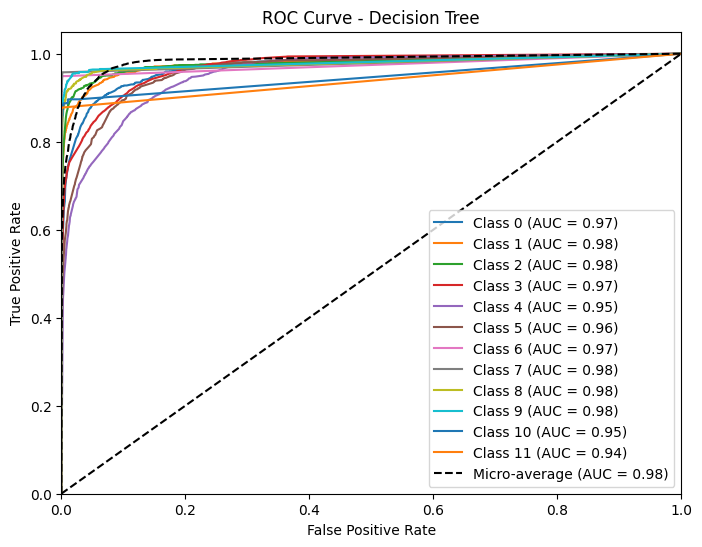

Training Random Forest...
train:  0.9310524807044303
test:  0.8494906342425238


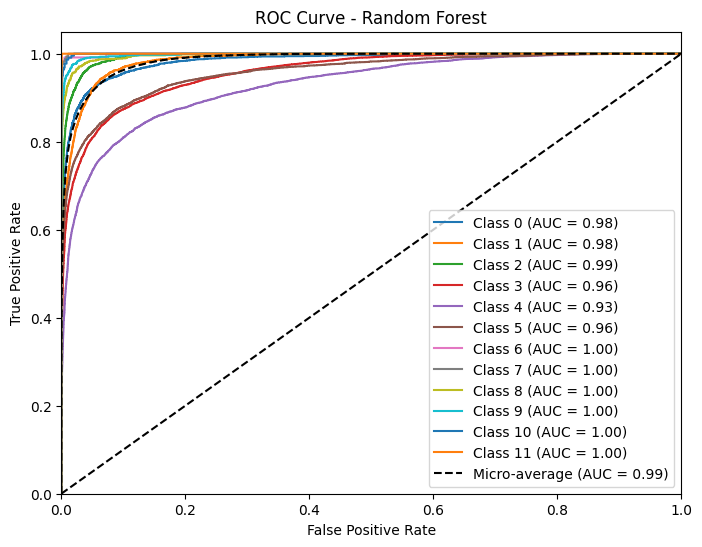

Training XGBoost...
train:  0.9525615646313694
test:  0.9102606233726839


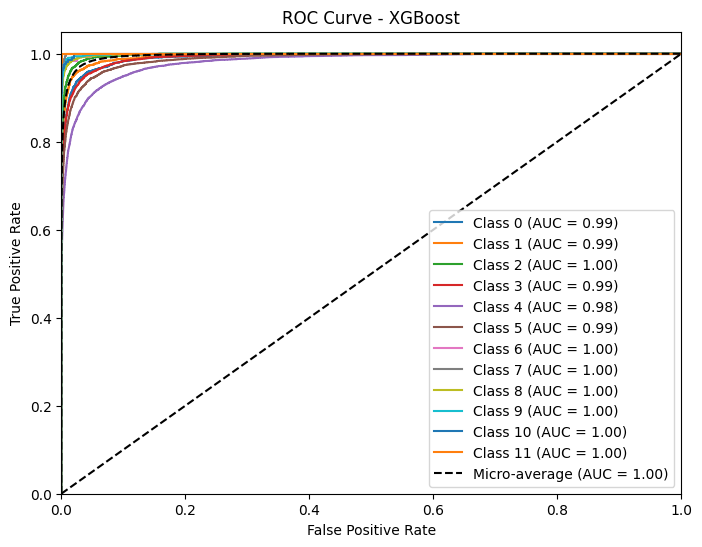

Training LightGBM...
train:  0.9695327416205575
test:  0.9347051239920119


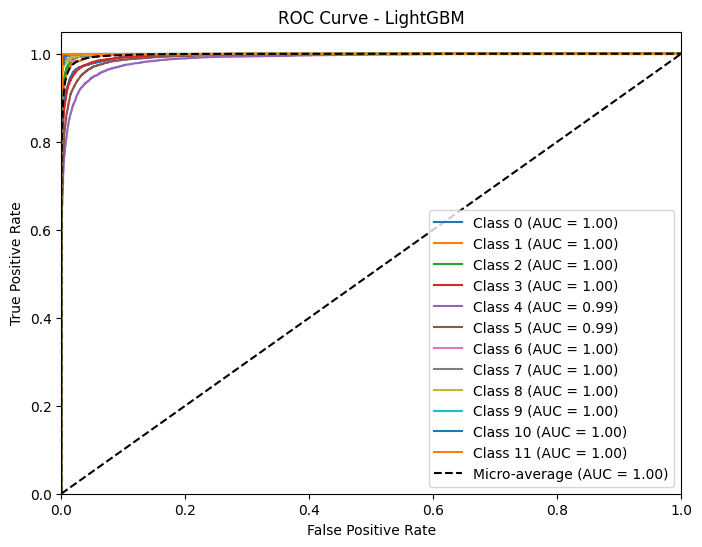

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# file to store the results
results_file = open("results.txt", "w")

# Binarize labels for ROC curve (OvR)
classes = np.unique(y_train)
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_train_bin.shape[1]

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train/Test accuracy and classification reports
    print("train: ", accuracy_score(y_train, y_train_pred))
    results_file.write(f"\n=== {model_name} ===\n")
    results_file.write("Train\n")
    results_file.write(classification_report(y_train, y_train_pred))
    
    print("test: ", accuracy_score(y_test, y_test_pred))
    results_file.write("Test\n")
    results_file.write(classification_report(y_test, y_test_pred))
    
    # --- ROC curve ---
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        
        # Some models return list of arrays (one per class)
        if isinstance(y_score, list):
            y_score = np.array([p[:,1] for p in y_score]).T
        
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Micro-average ROC
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
        
        plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color="black",
                 label=f"Micro-average (AUC = {roc_auc['micro']:.2f})")
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_name}")
        plt.legend(loc="lower right")
        plt.show()

results_file.close()
